In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import os
import glob
import sys

In [2]:
from utils import set_basepath

In [3]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data/notebooks/feature'

In [4]:
basepath = set_basepath(steps=2)

In [5]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data'

In [6]:
from src.team import Team
from src.game import Game
from src.play import Play
from src.player import Player
from src.analysis import process_games

In [7]:
games = pd.read_csv(os.path.join(basepath,'data/games.csv'))

In [8]:
players = pd.read_csv(os.path.join(basepath,'data/players.csv')).set_index('nflId')

In [9]:
plays = pd.read_csv(os.path.join(basepath,'data/plays.csv'))

In [10]:
weeks = {}
for i in range(3):
    name = f'week{i+1}'
    weeks[name] = pd.read_csv(os.path.join(basepath,'data',name+'-processed.csv'))

In [11]:
teams = process_games(games,plays)

In [12]:
team = teams['IND']

In [13]:
team.games

{'week1': <src.game.Game at 0x1a2b239358>,
 'week2': <src.game.Game at 0x1a2b24f0f0>,
 'week3': <src.game.Game at 0x1a2b266d68>,
 'week4': <src.game.Game at 0x1a1cd4fb70>,
 'week5': <src.game.Game at 0x1a1cd66ac8>,
 'week6': <src.game.Game at 0x1a1cd90828>,
 'week7': <src.game.Game at 0x1a1cd98fd0>,
 'week8': <src.game.Game at 0x1a1cfbf828>,
 'week10': <src.game.Game at 0x1a1cfe1630>,
 'week11': <src.game.Game at 0x1a1cff4b70>,
 'week12': <src.game.Game at 0x1a1d008fd0>,
 'week13': <src.game.Game at 0x1a1d02b2e8>,
 'week14': <src.game.Game at 0x1a1d03c588>,
 'week15': <src.game.Game at 0x1a1d056390>,
 'week16': <src.game.Game at 0x1a1d0618d0>,
 'week17': <src.game.Game at 0x1a1d086828>}

In [14]:
team.process_weeks(weeks)

/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance from line'] = self.player_tracking['x'] - self.line_of_scrimmage
/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance to sideline'] = [min((160/3) - y,y) for y in self.player_tracking['y'].values]
/Users/jacobhow/Documents/programming-projects/nfl-big-data/sr

In [15]:
game = team.games['week2']
game.list_plays()

Play 1: (8:42) (Shotgun) A.Smith pass short left to A.Peterson to IND 44 for 6 yards (D.Leonard).
Play 2: (7:20) (Shotgun) A.Smith pass short middle to P.Richardson to IND 44 for 1 yard (D.Leonard).
Play 3: (4:58) (Shotgun) A.Smith pass short left to A.Peterson ran ob at WAS 41 for 3 yards.
Play 4: (2:33) A.Smith pass incomplete deep left to J.Doctson.
Play 5: (13:09) A.Smith pass short right to A.Peterson pushed ob at IND 37 for 21 yards (N.Hairston). WAS-B.Scherff was injured during the play. His return is Questionable.  75 - has a right knee injury
Play 6: (12:29) A.Smith sacked at IND 39 for -7 yards (J.Sheard).
Play 7: (11:21) (Shotgun) A.Smith pass incomplete short middle to J.Doctson (J.Sheard).
Play 8: (6:14) (Shotgun) A.Smith pass short right to J.Reed to WAS 29 for 4 yards (D.Leonard).
Play 9: (5:39) (Shotgun) A.Smith pass incomplete deep middle to P.Richardson (M.Farley).
Play 10: (3:44) (Shotgun) A.Smith pass short right to C.Thompson to WAS 37 for 8 yards (D.Leonard).
Play

In [16]:
for play in game.plays:
    play.process_players(players)
    if play.hasForwardPass:
        play.find_dropback_events()

In [17]:
play_number = 2

In [18]:
play = game.plays[play_number - 1]

In [19]:
play.play_data

gameId                                                           2018091608
playId                                                                  430
playDescription           (7:20) (Shotgun) A.Smith pass short middle to ...
quarter                                                                   1
down                                                                      3
yardsToGo                                                                 5
possessionTeam                                                          WAS
playType                                                     play_type_pass
yardlineSide                                                            IND
yardlineNumber                                                           45
offenseFormation                                                      EMPTY
personnelO                                                 1 RB, 1 TE, 3 WR
defendersInTheBox                                                         5
numberOfPass

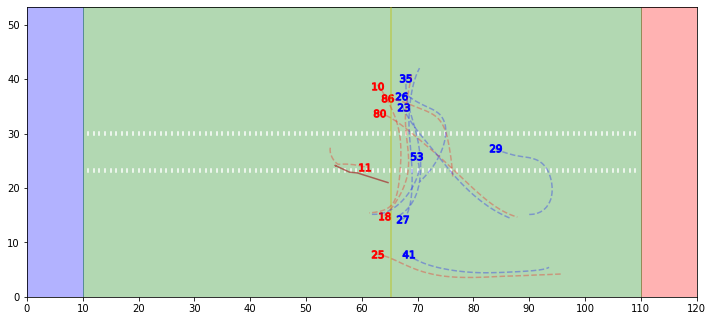

In [20]:
play.plot_play(markers='number')

In [21]:
play.find_initial_locks()

    Pierre Desir (CB-35) covering Paul Richardson (WR-10)
    Clayton Geathers (FS-26) covering Jordan Reed (TE-86)
    Kenny Moore II (CB-23) covering Jamison Crowder (WR-80)
    Matthias Farley (SS-41) covering Chris Thompson (RB-25)
    Nate Hairston (CB-27) covering Josh Doctson (WR-18)


In [22]:
play.find_zone_locations()

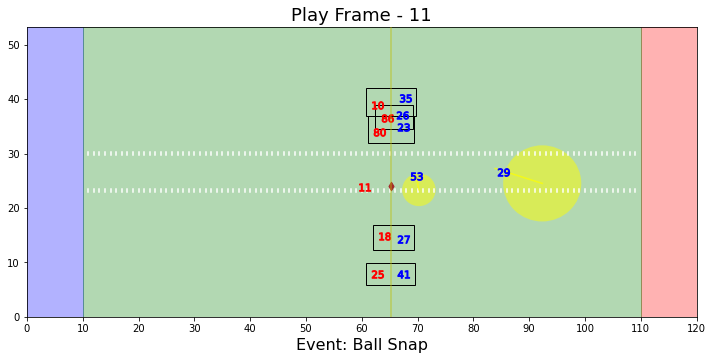

In [23]:
play.plot_play_frame(index='ball_snap',show_coverage=True,markers='number')

In [24]:
play.events

{'ball_snap': 11,
 'pass_forward': 40,
 'pass_arrived': 47,
 'pass_outcome_caught': 49,
 'first_contact': 52,
 'tackle': 62,
 'peak_dropback': 25,
 'end_dropback': 32}

In [25]:
cb = play.return_player_by_number(27,'defense')

In [26]:
wr = play.return_player_by_number(18,'offense')

In [27]:
start = play.events['ball_snap'] - 1
end = play.events['pass_forward']

In [28]:
half = start + ((end - start) // 3) * 2

In [29]:
half

30

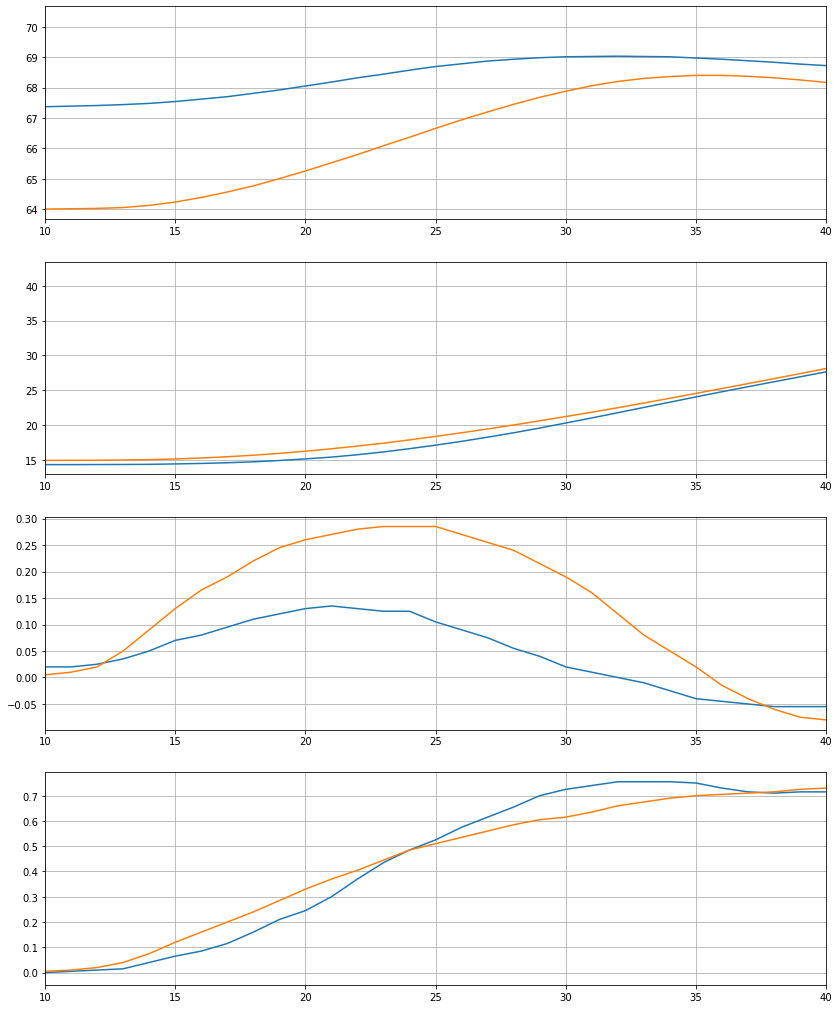

In [30]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(14,18))

ax1.plot(cb.x)
ax1.plot(wr.x)

ax2.plot(cb.y)
ax2.plot(wr.y)

ax3.plot(cb.dx)
ax3.plot(wr.dx)

ax4.plot(cb.dy)
ax4.plot(wr.dy)

for ax in (ax1,ax2,ax3,ax4):
    ax.grid()
    ax.set_xlim(start,end)
    
plt.show()

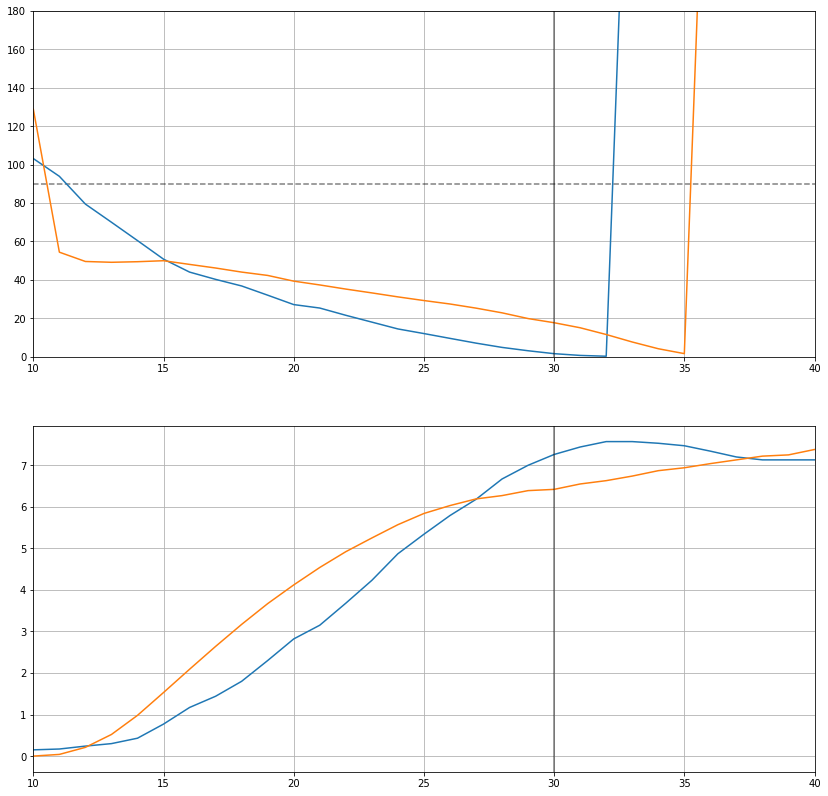

In [31]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(14,14))

ax1.axhline(90,color='k',alpha=.5,linestyle='--')
ax1.plot(cb.dir)
ax1.plot(wr.dir)
ax1.set_ylim(0,180)

ax2.plot(cb.s)
ax2.plot(wr.s)

for ax in (ax1,ax2):
    ax.grid()
    ax.set_xlim(start,end)
    ax.axvline(half,color='k',alpha=.5)
    
plt.show()

In [32]:
def orientation_array(theta):
    _theta = np.radians(theta)
    return np.array([np.sin(_theta),np.cos(_theta)])

In [33]:
wrap_window = 15

In [34]:
cb_last_third_dir = cb.dir[half:end]
if (cb_last_third_dir > (360-wrap_window)).any() and (cb_last_third_dir < wrap_window).any():
    cb_last_third_dir = (cb_last_third_dir + 180) % 360 - 180

cb_mean_dir = cb_last_third_dir.mean()
cb_mean_dir

-1.827000000000001

In [35]:
cb_mean_s = cb.s[half:end].mean()
cb_mean_s

7.363999999999999

In [36]:
cb_target_pt = orientation_array(cb_mean_dir) * cb_mean_s
cb_target_pt

array([-0.23477729,  7.36025649])

In [37]:
wr_last_third_dir = wr.dir[half:end]
if (wr_last_third_dir > (360-wrap_window)).any() and (wr_last_third_dir < wrap_window).any():
    wr_last_third_dir = (wr_last_third_dir + 180) % 360 - 180

wr_mean_dir = wr_last_third_dir.mean()
wr_mean_dir

4.308999999999992

In [38]:
wr_mean_s = wr.s[half:end].mean()
wr_mean_s

6.879

In [39]:
wr_target_pt = orientation_array(wr_mean_dir) * wr_mean_s
wr_target_pt

array([0.51685616, 6.85955543])

In [40]:
delta = cb_target_pt - wr_target_pt
delta

array([-0.75163346,  0.50070106])

In [41]:
delta_norm = np.linalg.norm(delta)
delta_norm

0.9031358757646945